### Overfitting

[Link to source prompt](https://chatgpt.com/share/3b4bf16c-22cc-48d7-8a93-27082c221000)

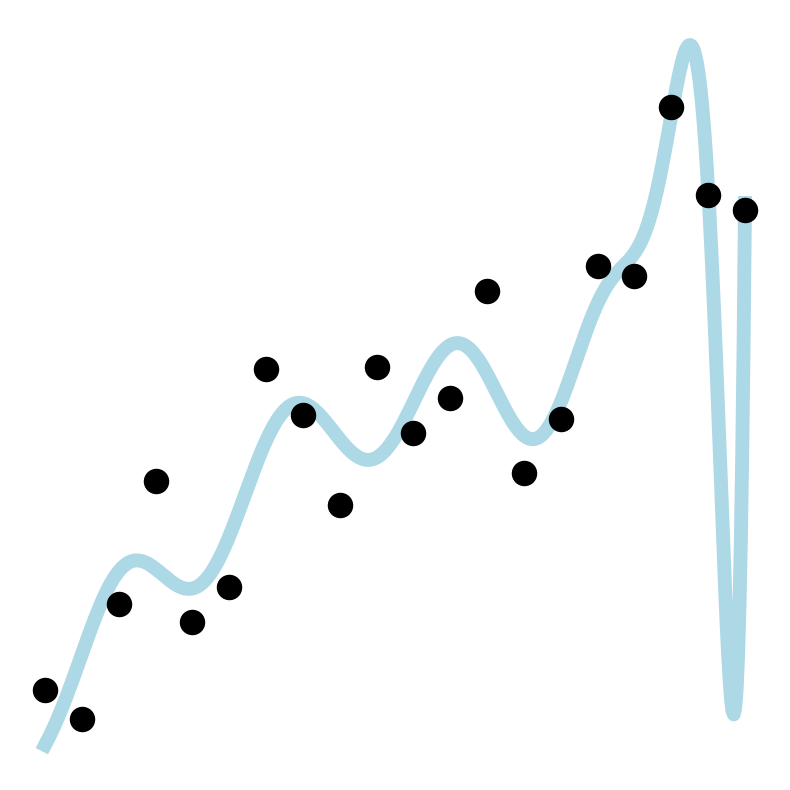

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Generate some data points that roughly fall on a straight line
x = np.linspace(0, 10, 20)
y = 2 * x + 1 + np.random.normal(0, 3, x.shape)

# Create polynomial features (degree 15 to grossly overfit)
degree = 15
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
poly_model.fit(x[:, np.newaxis], y)
x_fit = np.linspace(0, 10, 500)
y_fit = poly_model.predict(x_fit[:, np.newaxis])

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Plot data points
ax.scatter(x, y, color='black', s=300, zorder=5)

# Plot overfitted polynomial
ax.plot(x_fit, y_fit, color='lightblue', linewidth=10, zorder=1)

# Remove axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Set background color
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Show plot
plt.tight_layout()
plt.show()


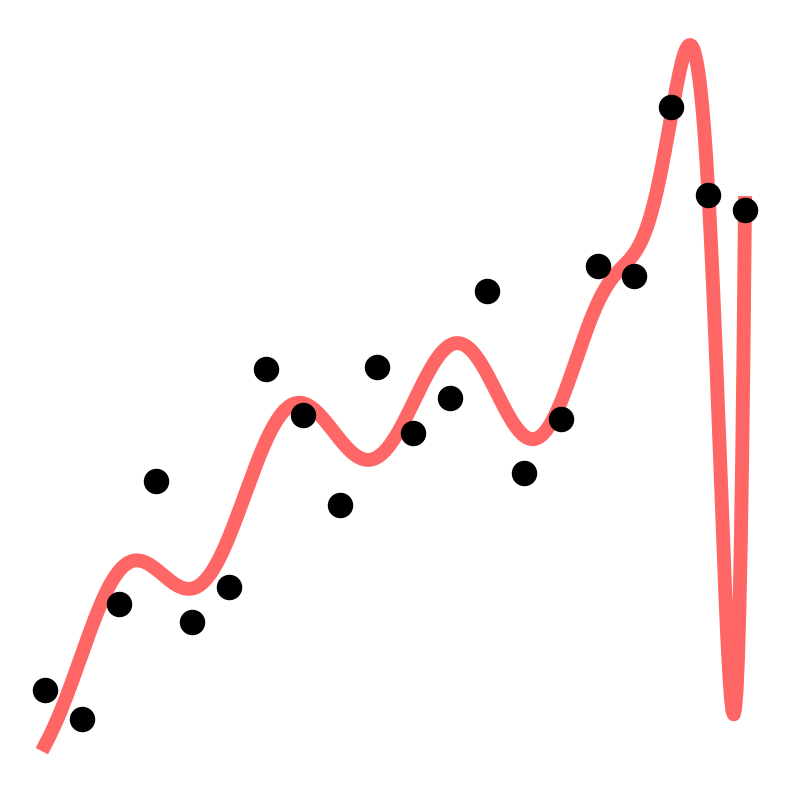

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Generate some data points that roughly fall on a straight line
x = np.linspace(0, 10, 20)
y = 2 * x + 1 + np.random.normal(0, 3, x.shape)

# Create polynomial features (degree 15 to grossly overfit)
degree = 15
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the polynomial model
poly_model.fit(x[:, np.newaxis], y)
x_fit = np.linspace(0, 10, 500)
y_fit = poly_model.predict(x_fit[:, np.newaxis])

# Fit a simple linear model for comparison
linear_model = LinearRegression()
linear_model.fit(x[:, np.newaxis], y)
y_linear_fit = linear_model.predict(x_fit[:, np.newaxis])

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Plot data points
ax.scatter(x, y, color='black', s=300, zorder=5)

# Plot overfitted polynomial
ax.plot(x_fit, y_fit, color='red', linewidth=10, alpha=0.6, zorder=1)

# Remove axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Set background color
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Show plot
plt.tight_layout()
plt.show()


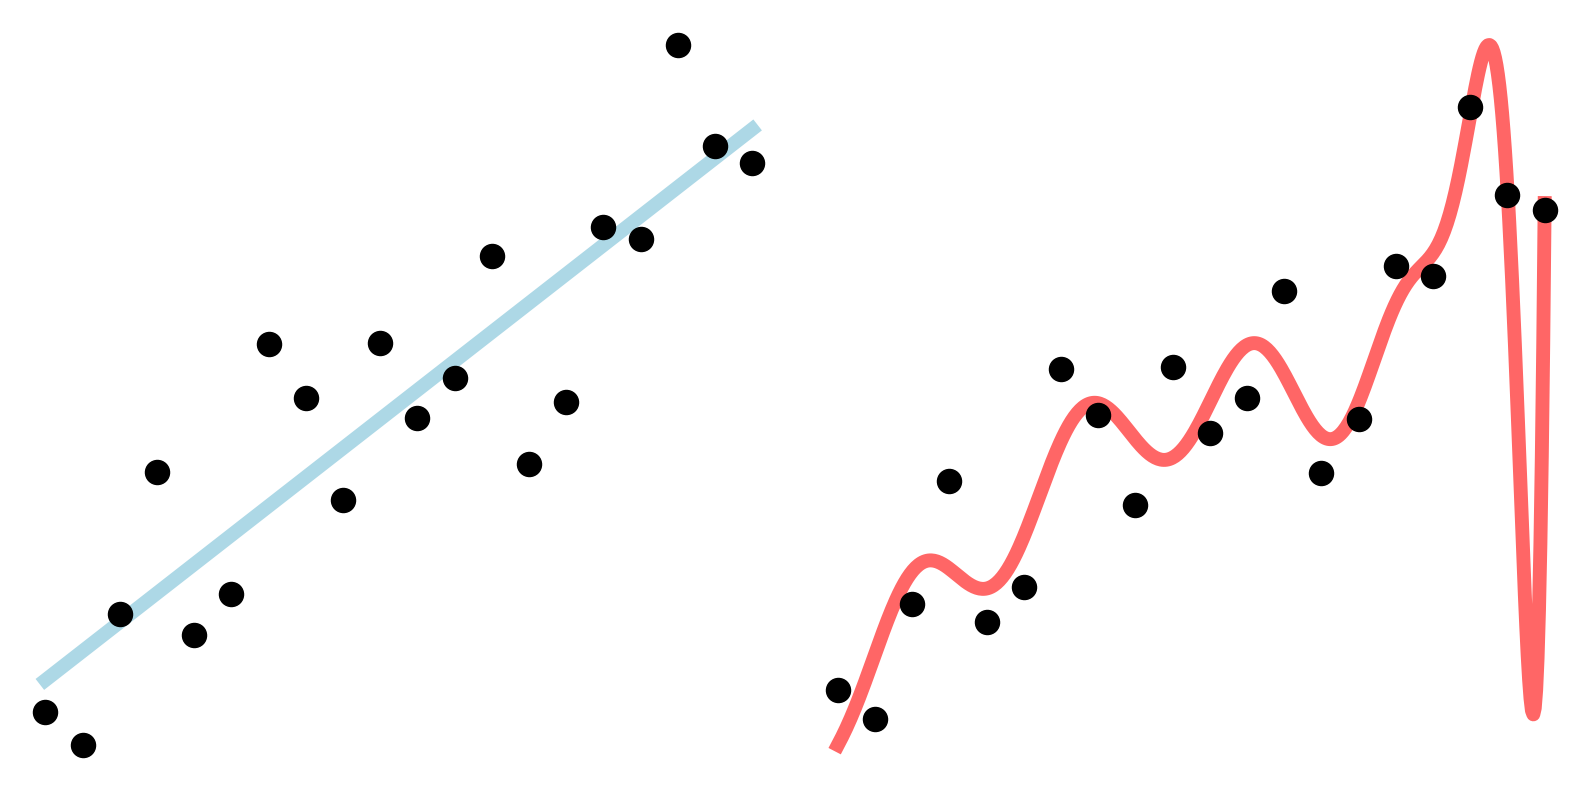

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Generate some data points that roughly fall on a straight line
x = np.linspace(0, 10, 20)
y = 2 * x + 1 + np.random.normal(0, 3, x.shape)

# Create polynomial features (degree 15 to grossly overfit)
degree = 15
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the polynomial model
poly_model.fit(x[:, np.newaxis], y)
x_fit = np.linspace(0, 10, 500)
y_fit = poly_model.predict(x_fit[:, np.newaxis])

# Fit a simple linear model for comparison
linear_model = LinearRegression()
linear_model.fit(x[:, np.newaxis], y)
y_linear_fit = linear_model.predict(x_fit[:, np.newaxis])

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot data points and best fit line in the first plot
ax1.scatter(x, y, color='black', s=300, zorder=5)
ax1.plot(x_fit, y_linear_fit, color='lightblue', linewidth=10, linestyle='-', zorder=2)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_frame_on(False)
ax1.set_facecolor('white')

# Plot data points and overfitted polynomial in the second plot
ax2.scatter(x, y, color='black', s=300, zorder=5)
ax2.plot(x_fit, y_fit, color='red', linewidth=10, alpha=0.6, zorder=1)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_frame_on(False)
ax2.set_facecolor('white')

# Set background color for the figure
fig.patch.set_facecolor('white')

# Show plot
plt.tight_layout()
plt.show()


### GNN Pipeline for Representation

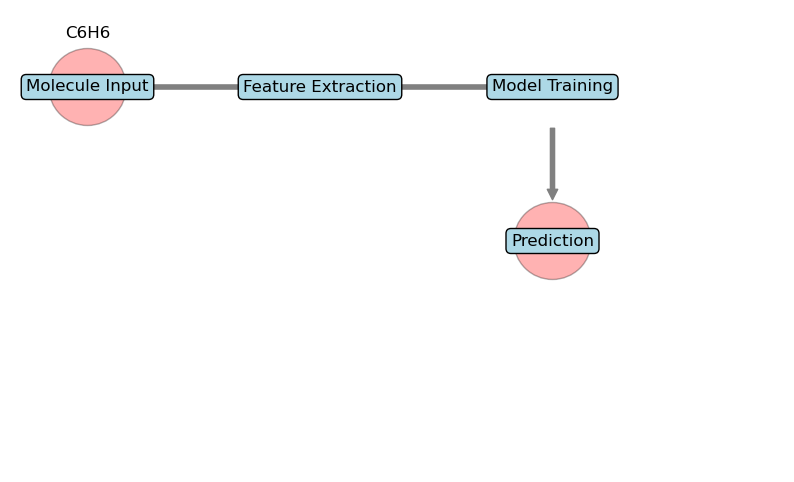

In [12]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch, Circle
import numpy as np

# Define the function to draw text with a background box
def draw_text(ax, xy, text, boxstyle="round,pad=0.3", color="lightblue", size=12):
    bbox_props = dict(boxstyle=boxstyle, fc=color, ec="black", lw=1)
    ax.text(xy[0], xy[1], text, ha="center", va="center", size=size, bbox=bbox_props)

# Define the function to draw an arrow
def draw_arrow(ax, start, end, color="gray", style="simple", width=1):
    arrow = FancyArrowPatch(start, end, arrowstyle=style, color=color, mutation_scale=15, lw=width)
    ax.add_patch(arrow)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.axis("off")

# Draw the stages of the pipeline
stages = [
    {"pos": (1, 5), "text": "Molecule Input"},
    {"pos": (4, 5), "text": "Feature Extraction"},
    {"pos": (7, 5), "text": "Model Training"},
    {"pos": (7, 3), "text": "Prediction"},
]

# Draw circles for molecule input and prediction
circle_molecule = Circle((1, 5), 0.5, color="red", alpha=0.3, ec="black")
ax.add_patch(circle_molecule)
circle_prediction = Circle((7, 3), 0.5, color="red", alpha=0.3, ec="black")
ax.add_patch(circle_prediction)

# Draw text and rectangles for other stages
for stage in stages:
    if "circle" in stage:
        circle = Circle(stage["pos"], 0.5, color="red", alpha=0.3, ec="black")
        ax.add_patch(circle)
    else:
        draw_text(ax, stage["pos"], stage["text"], color="lightblue")

# Draw arrows between stages
arrows = [
    ((1.5, 5), (3.5, 5)),
    ((4.5, 5), (6.5, 5)),
    ((7, 4.5), (7, 3.5)),
]

for start, end in arrows:
    draw_arrow(ax, start, end)

# Additional elements (optional)
# Example molecule structure
example_molecule = "C6H6"  # Benzene for illustrative purposes
ax.text(1, 5.7, example_molecule, ha="center", va="center", size=12)

# Display the figure
plt.show()


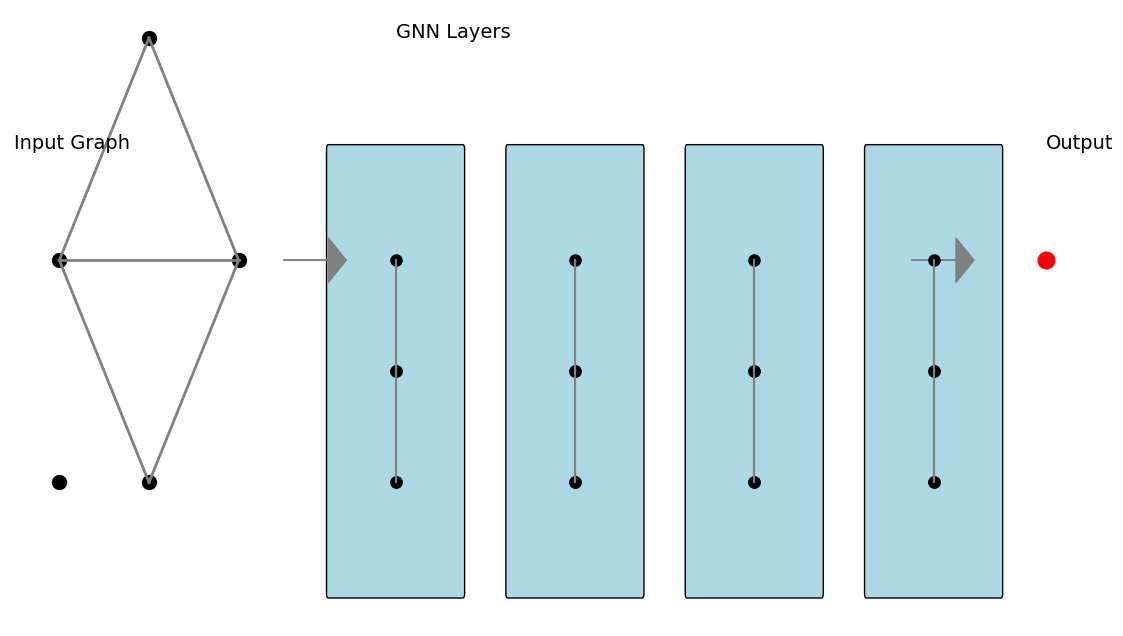

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def draw_gnn():
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.axis('off')

    # Define colors
    node_color = 'black'
    edge_color = 'gray'
    layer_color = 'lightblue'
    background_color = 'white'
    text_color = 'black'

    # Set the background color
    fig.patch.set_facecolor(background_color)
    ax.set_facecolor(background_color)

    # Draw nodes for the input graph
    input_nodes = [(1, 7), (2, 8), (3, 7), (2, 6), (1, 6)]
    for node in input_nodes:
        ax.plot(node[0], node[1], 'o', color=node_color, markersize=10)
    input_edges = [(0, 1), (1, 2), (2, 3), (3, 0), (0, 2)]
    for edge in input_edges:
        ax.plot([input_nodes[edge[0]][0], input_nodes[edge[1]][0]], 
                [input_nodes[edge[0]][1], input_nodes[edge[1]][1]], color=edge_color, linewidth=2)
    
    # Draw layers
    layer_positions = [4, 6, 8, 10]
    layer_heights = [6, 6.5, 7, 6.5, 6]
    for pos in layer_positions:
        layer_box = patches.FancyBboxPatch((pos, 5.5), 1.5, 2, boxstyle="round,pad=0.02", edgecolor='black', facecolor=layer_color, zorder=0)
        ax.add_patch(layer_box)
        for i in range(len(layer_heights)):
            ax.plot(pos+0.75, layer_heights[i], 'o', color=node_color, markersize=8)
        for i in range(len(layer_heights)-1):
            ax.plot([pos+0.75, pos+0.75], [layer_heights[i], layer_heights[i+1]], color=edge_color, linewidth=1.5)
    
    # Draw the output layer
    output_node = (12, 7)
    ax.plot(output_node[0], output_node[1], 'o', color='red', markersize=12)
    
    # Add text labels
    ax.text(0.5, 7.5, 'Input Graph', fontsize=14, color=text_color)
    ax.text(4.75, 8, 'GNN Layers', fontsize=14, color=text_color)
    ax.text(12, 7.5, 'Output', fontsize=14, color=text_color)
    
    # Draw arrows between components
    ax.arrow(3.5, 7, 0.5, 0, head_width=0.2, head_length=0.2, fc=edge_color, ec=edge_color)
    ax.arrow(10.5, 7, 0.5, 0, head_width=0.2, head_length=0.2, fc=edge_color, ec=edge_color)
    
    plt.show()

draw_gnn()
